Bibliotecas

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

Tratamento dos dados

In [2]:
# Carregar CSV
df_pokemon = pd.read_csv('../../datasets/pokemon/pokemon_alopez247.csv')

# Verificar carregamento do arquivo
print(df_pokemon.head())

   Number        Name Type_1  Type_2  Total  HP  Attack  Defense  Sp_Atk  \
0       1   Bulbasaur  Grass  Poison    318  45      49       49      65   
1       2     Ivysaur  Grass  Poison    405  60      62       63      80   
2       3    Venusaur  Grass  Poison    525  80      82       83     100   
3       4  Charmander   Fire     NaN    309  39      52       43      60   
4       5  Charmeleon   Fire     NaN    405  58      64       58      80   

   Sp_Def  ...  Color  hasGender  Pr_Male Egg_Group_1  Egg_Group_2  \
0      65  ...  Green       True    0.875     Monster        Grass   
1      80  ...  Green       True    0.875     Monster        Grass   
2     100  ...  Green       True    0.875     Monster        Grass   
3      50  ...    Red       True    0.875     Monster       Dragon   
4      65  ...    Red       True    0.875     Monster       Dragon   

   hasMegaEvolution Height_m Weight_kg  Catch_Rate      Body_Style  
0             False     0.71       6.9          45   

In [3]:
# Mostrar a colunas do dataframe
print(df_pokemon.columns)

Index(['Number', 'Name', 'Type_1', 'Type_2', 'Total', 'HP', 'Attack',
       'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Generation', 'isLegendary',
       'Color', 'hasGender', 'Pr_Male', 'Egg_Group_1', 'Egg_Group_2',
       'hasMegaEvolution', 'Height_m', 'Weight_kg', 'Catch_Rate',
       'Body_Style'],
      dtype='object')


In [12]:
# Remover colunas irrelevantes
df = df_pokemon.drop(columns=[ 'Name', 'Total', 'Color', 'Body_Style'])

#Preencher valores nulos em Type_2
df['Type_2'] = df['Type_2'].fillna('None')

# Separar as caracteristicas e a variável altura
height = df['Height_m']
weight = df['Weight_kg']
features = df.drop(columns=['Height_m'])

In [5]:
# Mostrar a colunas do dataframe após ajustes
print(features.columns)

Index(['Number', 'Type_1', 'Type_2', 'HP', 'Attack', 'Defense', 'Sp_Atk',
       'Sp_Def', 'Speed', 'Generation', 'isLegendary', 'hasGender', 'Pr_Male',
       'Egg_Group_1', 'Egg_Group_2', 'hasMegaEvolution', 'Weight_kg',
       'Catch_Rate'],
      dtype='object')


In [6]:
# Transformar as variaveis categoricas
features_encoded = pd.get_dummies(features, columns=['Type_1', 'Type_2', 'Generation', 'isLegendary', 'hasGender', 'Egg_Group_1', 'Egg_Group_2', 'hasMegaEvolution'], drop_first=True)

In [7]:
# Normalizar dados numericos
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_encoded)

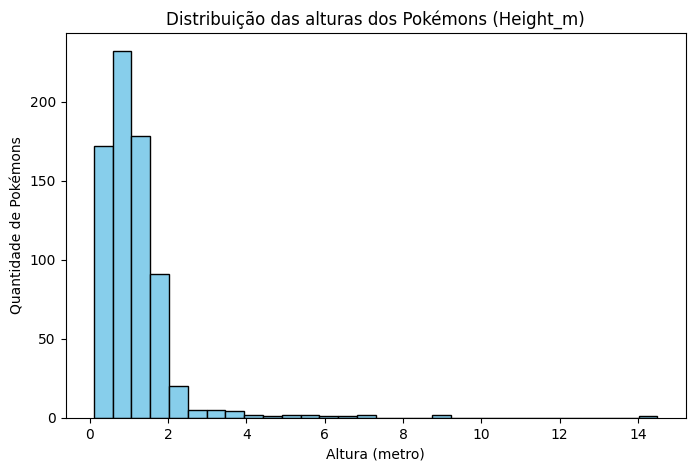

In [8]:
# Histograma da altura
plt.figure(figsize=(8,5))
plt.hist(height, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribuição das alturas dos Pokémons (Height_m)')
plt.xlabel('Altura (metro)')
plt.ylabel('Quantidade de Pokémons')
plt.show()

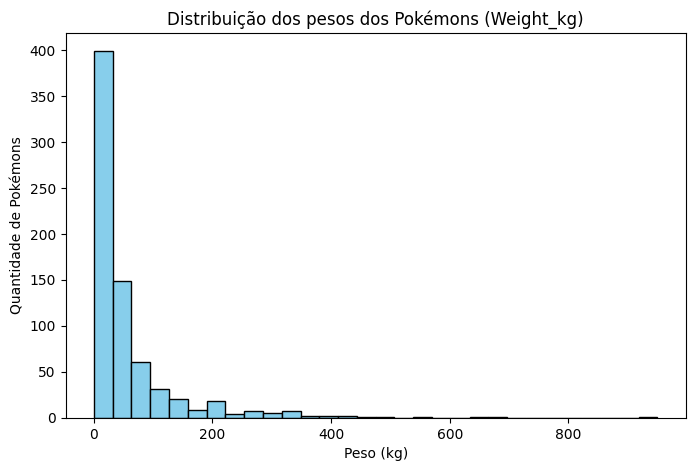

In [14]:
# Histograma do peso
plt.figure(figsize=(8,5))
plt.hist(weight, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribuição dos pesos dos Pokémons (Weight_kg)')
plt.xlabel('Peso (kg)')
plt.ylabel('Quantidade de Pokémons')
plt.show()

In [9]:
#Criar bins baseados nos quartis
quartis = np.quantile(height, [0, 0.25, 0.5, 0.75, 1])

print ("Faixas sugeridas (quartis):", quartis)

Faixas sugeridas (quartis): [ 0.1   0.61  0.99  1.4  14.5 ]


In [10]:
# Criar bins com base nos quartis
labels = [0,1,2,3]
height_binned = pd.cut(height, bins=quartis, labels=labels, include_lowest=True)

# Verificar balanceamento
print(height_binned.value_counts())

Height_m
0    238
3    180
1    166
2    137
Name: count, dtype: int64


In [11]:
# Realizar o split estratificado
features_train, features_test, height_train, height_test = train_test_split(
    features_scaled, height, test_size=0.2, random_state=42, stratify=height_binned)